<a href="https://colab.research.google.com/github/AnaghaWani/EDA/blob/main/nuforc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
#EDA on NUFORC Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt

In [125]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [126]:
ufo_db = "/content/drive/MyDrive/EDA-NUFORC-Dataset/scrubbed.csv"
ufo_data = pd.read_csv(ufo_db, low_memory = False)

In [127]:
ufo_data.shape

(80332, 11)

In [128]:
ufo_data.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [129]:

ufo_data.tail(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.477778


In [130]:
ufo_data.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [131]:
nulvals = ufo_data.isnull().sum()
nulpercent = (nulvals/len(ufo_data))*100
print("Null values (% of entries): ")
print(round(nulpercent.sort_values(ascending = False),2))

Null values (% of entries): 
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
datetime                 0.00
city                     0.00
duration (seconds)       0.00
duration (hours/min)     0.00
date posted              0.00
latitude                 0.00
longitude                0.00
dtype: float64


In [132]:
ufo_data['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [133]:
ufo_data = pd.read_csv(ufo_db, low_memory=False, na_values=['UNKNOWN', 'UNK'],
                       na_filter=True, skip_blank_lines=True)

In [134]:
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
        'comments', 'date posted', 'latitude',
       'longitude ']

In [135]:
ufo_data = pd.DataFrame(data=ufo_data, columns=ufo_subcols)

In [136]:
ufo_data = ufo_data.dropna(thresh=8)

In [137]:
ufo_data = ufo_data.reset_index(drop=True)

In [138]:
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'],errors = 'coerce')
ufo_data['longitude '] = pd.to_numeric(ufo_data['longitude '], errors='coerce')

In [139]:
ufo_date = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')
ufo_data['datetime'] = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')

In [140]:
ufo_data.shape

(80257, 10)

In [141]:
#visuals

In [142]:
#Visualisation of UFO sightings by Year
ufo_yr = ufo_date.dt.year
years_data = ufo_yr.value_counts()
years_index = years_data.index
years_values = years_data.values

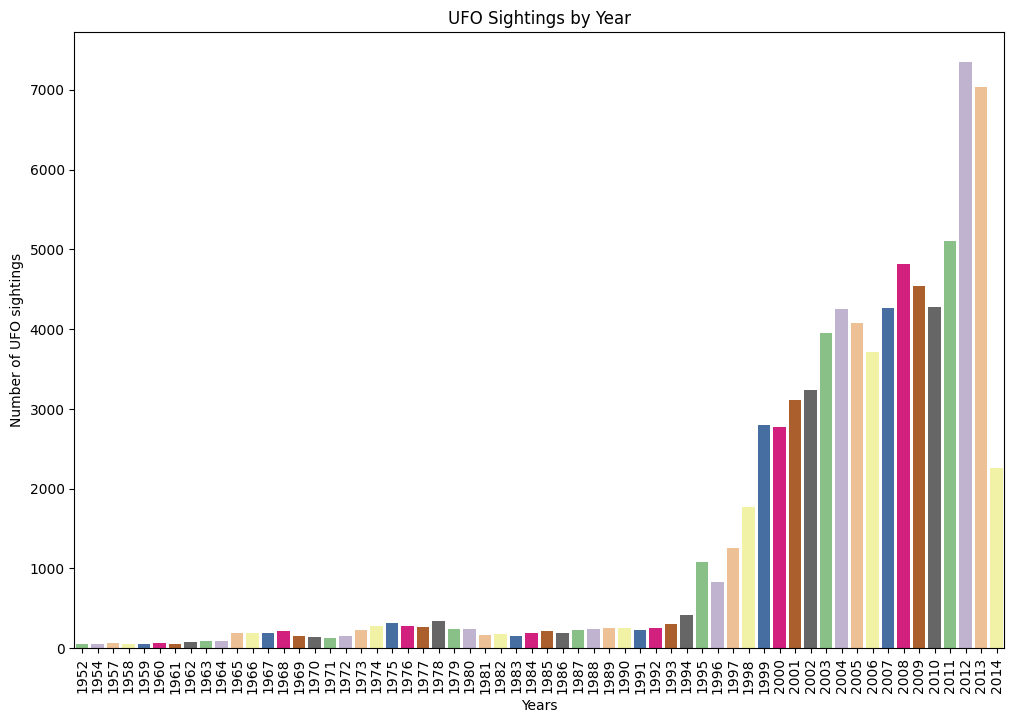

In [143]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
plt.title('UFO Sightings by Year')
plt.xlabel("Years")
plt.ylabel("Number of UFO sightings")

years_plot = sns.barplot(x=years_index[:60], y=years_values[:60], hue=years_index[:60], legend = False, palette = "Accent")

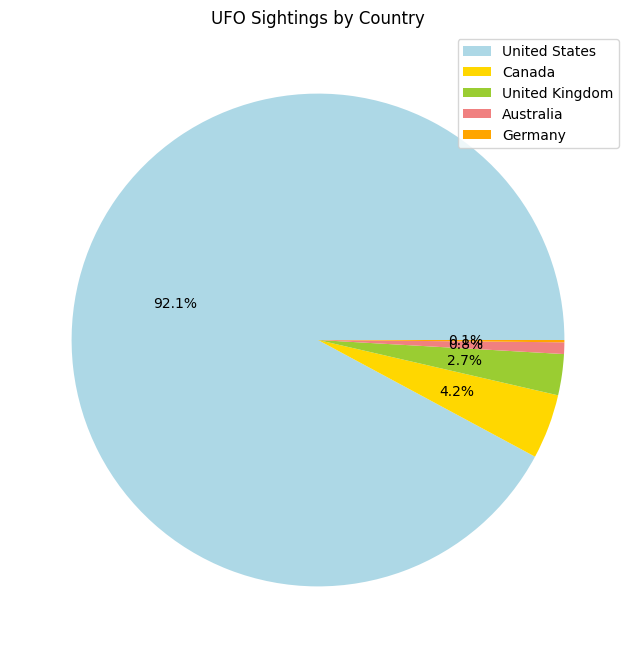

In [144]:
#Visualisation of UFO sightings by country
country_sig = ufo_data.country.value_counts()
plt.figure(figsize=(8, 8))
colors = ['lightblue','gold','yellowgreen','lightcoral','orange']
plt.pie(country_sig, autopct='%1.1f%%',colors=colors, startangle=0)
plt.title("UFO Sightings by Country")
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="upper right")

In [145]:
#UFO sightings by US state

In [146]:
filter_us = ufo_data['country']=='us'
us_data = ufo_data[filter_us]

In [147]:
us_data['state'].value_counts().head(10)

ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: state, dtype: int64

In [148]:
state_sights = us_data.state.value_counts()
state_names = state_sights.index
state_freq =  state_sights.values

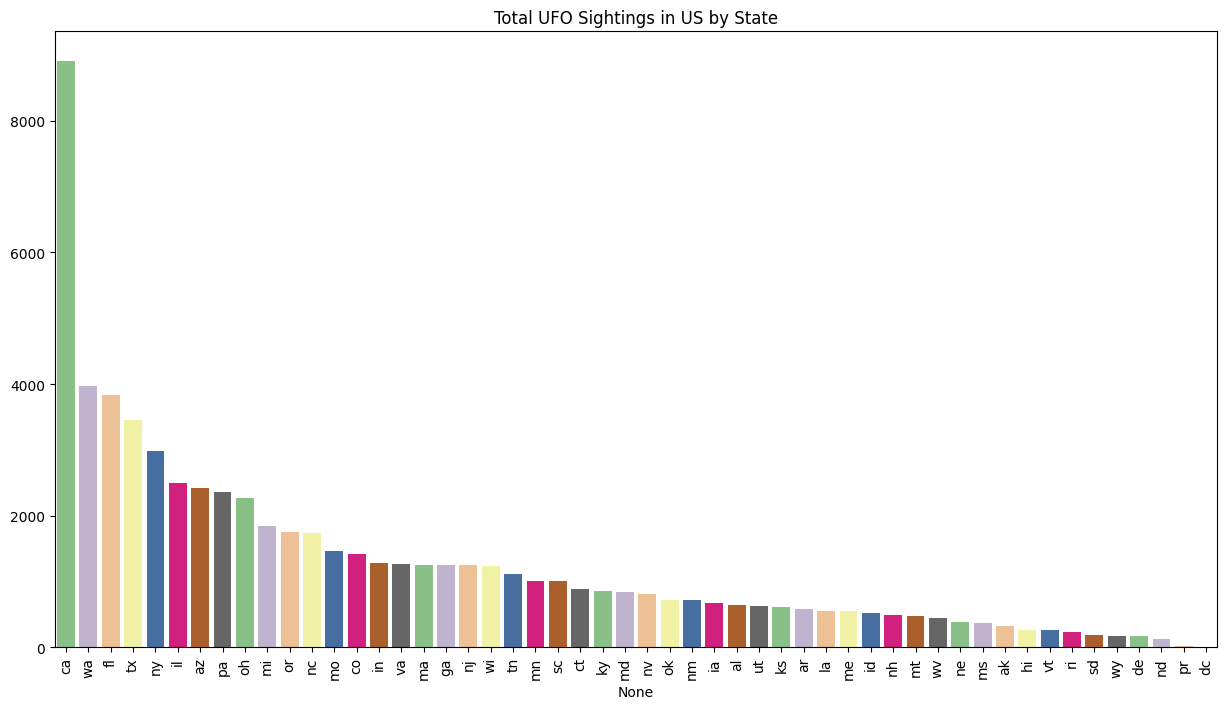

Top 10 States for Total UFO Sightings:
ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: state, dtype: int64


In [149]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.title('Total UFO Sightings in US by State')
states_plot = sns.barplot(x=state_names, y=state_freq, hue=state_name, legend=False, palette="Accent")
plt.show()
print('Top 10 States for Total UFO Sightings:')
print(state_sights[:10].sort_values(ascending=False))

In [150]:
statespop = {'al':4872725.,'ak':746079.,'az':7044577.,'ar':2998643.,'ca':39506094.,
            'co':5632271.,'ct':3568174.,'de':960054.,'dc':691963.,'fl':20979964.,
            'ga':10421344.,'hi':1431957.,'id':1713452.,'il':12764031.,'in':6653338.,
            'ia':3147389.,'ks':2907857.,'ky':4449337.,'la':4694372.,'me':1333505.,
            'md':6037911.,'ma':6839318.,'mi':9938885.,'mn':5557469.,'ms':2988062.,
            'mo':6109796.,'mt':1052967.,'ne':1920467.,'nv':2996358,'nh':1339479.,
            'nj':8953517.,'nm':2081702.,'ny':19743395.,'nc':10258390.,'nd':759069.,
            'oh':11623656.,'ok':3939708.,'or':4162296.,'pa':12776550.,'pr':3661538.,
            'ri':1057245.,'sc':5027404.,'sd':872989.,'tn':6707332.,'tx':28295553.,
            'ut':3111802.,'vt':623100.,'va':8456029.,'wa':7415710.,'wv':1821151.,
            'wi':5789525.,'wy':584447.}

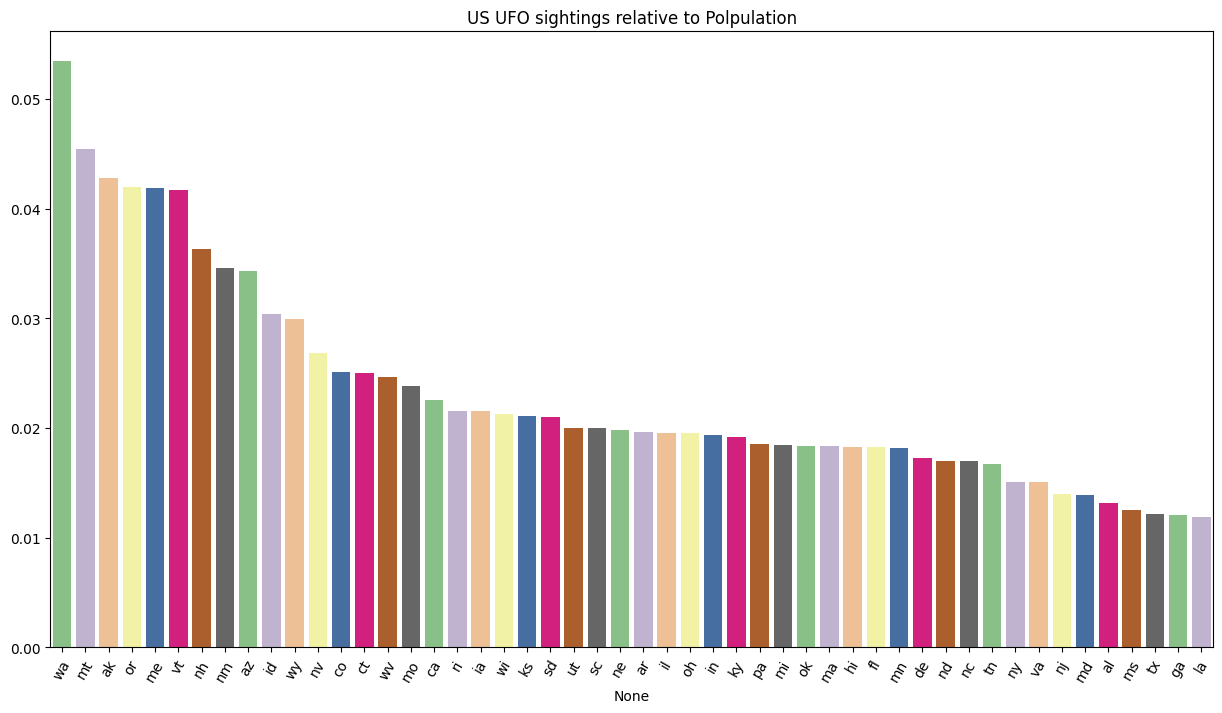

States with Highest Proportion of UFO Sightings:
wa    0.05
mt    0.05
ak    0.04
or    0.04
me    0.04
vt    0.04
nh    0.04
nm    0.03
az    0.03
id    0.03
dtype: float64


In [151]:
states_pop = pd.Series(statespop)
sight_by_pop = (state_sights / states_pop)*100
sight_by_pop = sight_by_pop.sort_values(ascending=False)
state_name = sight_by_pop.index
state_sight = sight_by_pop.values
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
plt.title("US UFO sightings relative to Polpulation")
sns.barplot(x=state_name[:50], y = state_sight[:50],hue=state_name[:50], legend=False, palette="Accent")
plt.show()
print('States with Highest Proportion of UFO Sightings:')
print(round(sight_by_pop[:10],2))

In [152]:
#Count of sightings relative to month

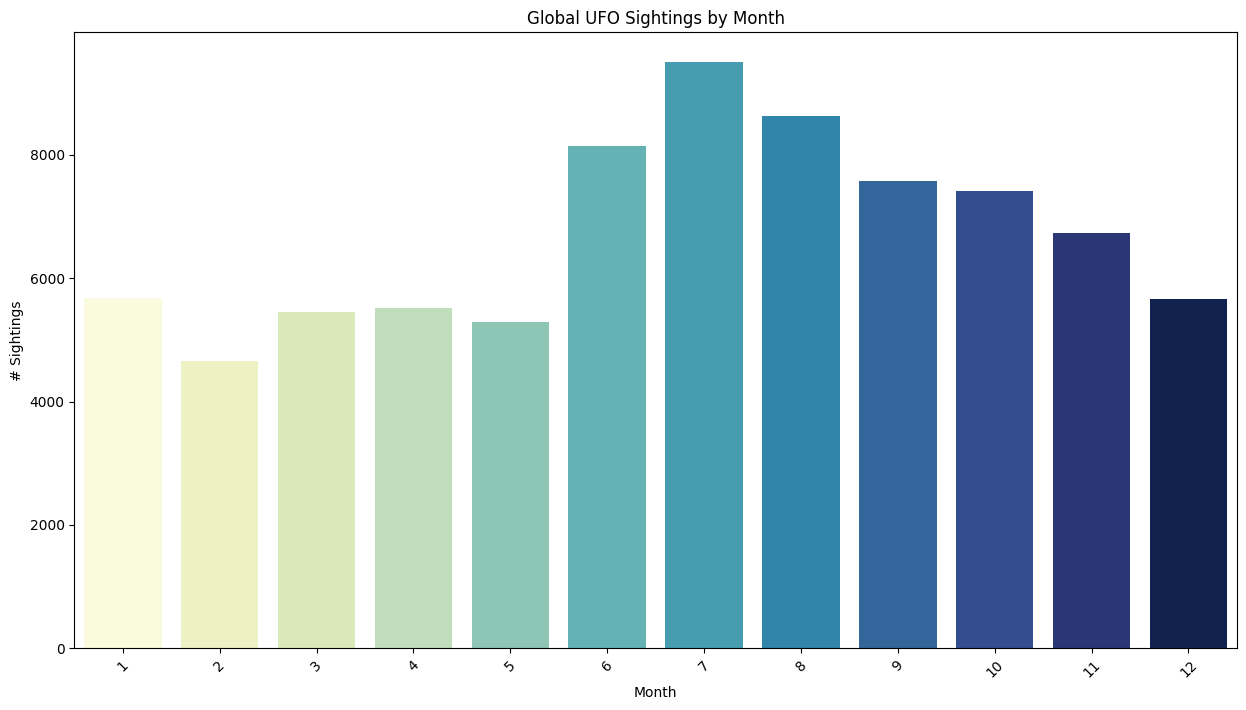

In [153]:
month_cnt = (ufo_data['datetime'].dt.month.value_counts()).sort_index()
month_cntx = month_cnt.index
month_cnty = month_cnt.values
f, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=month_cntx, y=month_cnty, hue=month_cntx, legend=False, palette="YlGnBu")
ax.set_title('Global UFO Sightings by Month')
ax.set_xlabel('Month')
ax.set_ylabel('# Sightings')
plt.xticks(rotation=45)
plt.show()

In [154]:
#Count of Sightings according to seasons
#Add seasons column to ufo_date

In [155]:
ufo_datem = ufo_date.dt.month
def get_season(dt_series):
    spring = range(5, 7)
    summer = range(7, 10)
    fall = range(10, 12)
    seasons = []

    for dt in ufo_datem:
        if dt in spring:
            seasons.append('Spring')
        elif dt in summer:
            seasons.append('Summer')
        elif dt in fall:
            seasons.append('Fall')
        else:
            seasons.append('Winter')
    return seasons

In [156]:
ufo_seasons = get_season(ufo_datem)

In [157]:
ufo_data['season'] = pd.Series(ufo_seasons, index=ufo_data.index)

In [158]:
latitudes=ufo_data['latitude']
def get_hemisphere(lat):
    hem = []
    for st_loc in lat:
        if st_loc >= 0 :
            hem.append('Northern Hemisphere')
        else:
            hem.append('Southern Hemisphere')
    return hem

In [159]:
hemis = get_hemisphere(latitudes)

In [160]:
ufo_data['hemisphere'] = (pd.Series(hemis, index=ufo_data.index)).astype('category')

In [161]:
ufo_data['season'].value_counts()

Winter    26971
Summer    25719
Fall      14142
Spring    13425
Name: season, dtype: int64

Text(0.5, 1.0, 'Count of UFO sightings by Seasons')

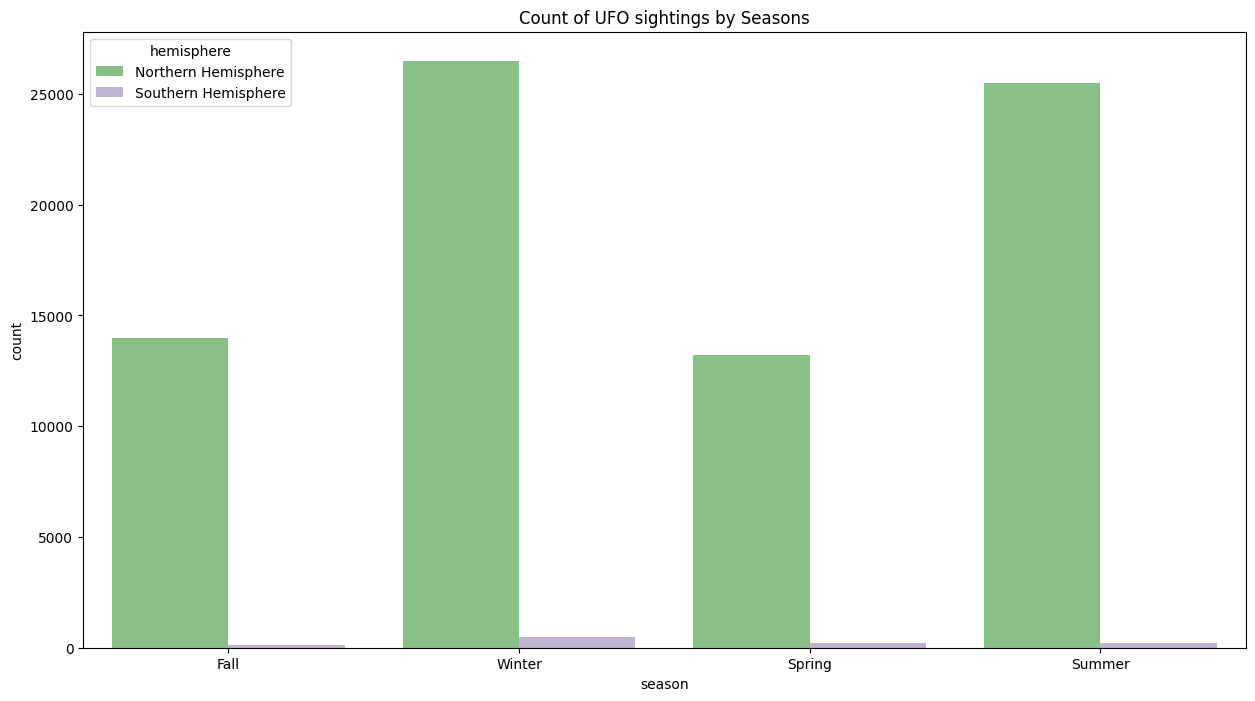

In [162]:
#Count of UFO sightings by Seasons
plt.figure(figsize=(15,8))
sns.countplot(x='season', hue='hemisphere', data=ufo_data, palette="Accent")
plt.title("Count of UFO sightings by Seasons")

In [163]:
print(max(ufo_data['latitude']))
print(min(ufo_data['latitude']))

72.7
-82.862752


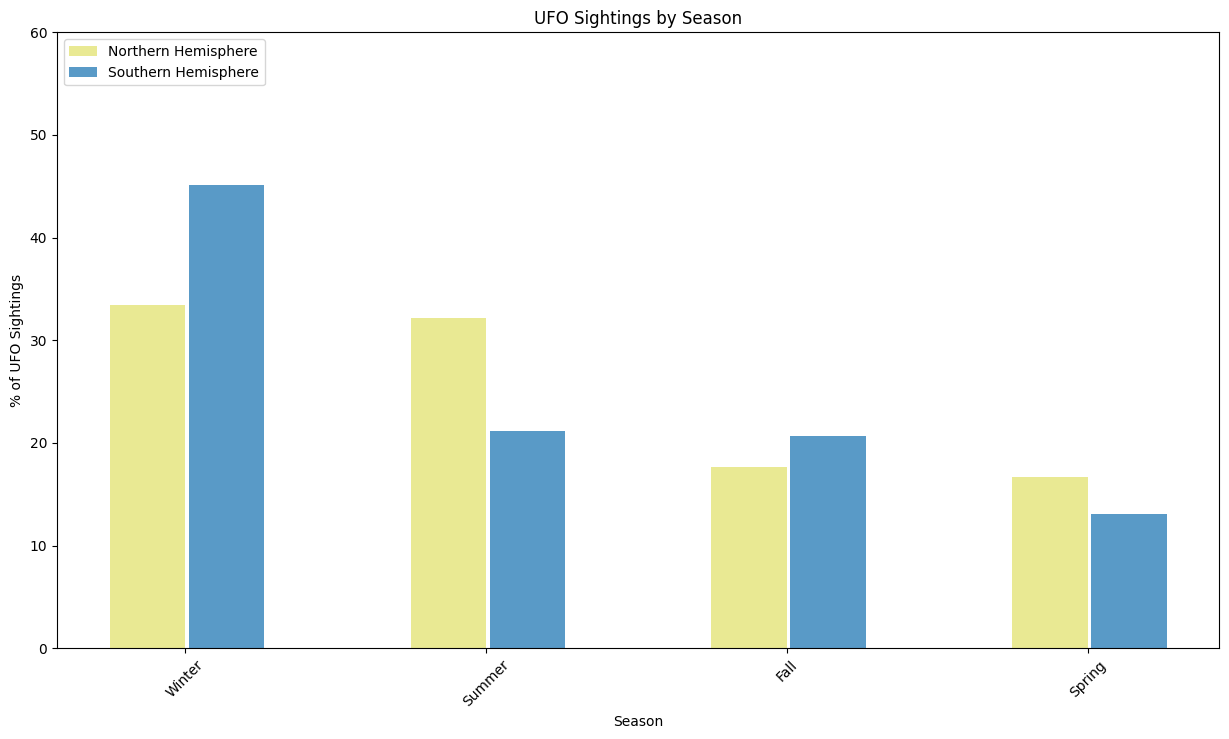

Northern Hemisphere:
 Winter    33.449099
Summer    32.200093
Fall      17.683089
Spring    16.667719
Name: season, dtype: float64
Southern Hemisphere:
 Winter    45.158287
Spring    21.135940
Summer    20.670391
Fall      13.035382
Name: season, dtype: float64


In [164]:
#Percentage of UFO Sightings by seasons
resp_n = ufo_data[ufo_data['hemisphere'] == 'Northern Hemisphere']#Filter for Northern hemisphere
resp_s = ufo_data[ufo_data['hemisphere'] == 'Southern Hemisphere']#Filter for Southern hemisphere
#seasonal Percent count of UFO sightings according to the hemispheres
nsperc = resp_n['season'].value_counts() / len(resp_n) * 100
ssperc = resp_s['season'].value_counts() / len(resp_s) * 100

#Visual
pos = list(range(len(nsperc)))
width = 0.25
fig, ax = plt.subplots(figsize = (15,8))

colors = ['#0064A9', '#E1E066']
plt.bar(pos, nsperc, width, alpha = .7, color=colors[1])
plt.bar([p + width*1.05 for p in pos], ssperc, width, alpha = .65, color=colors[0])

ax.set_title('UFO Sightings by Season')
ax.set_xlabel('Season')
ax.set_ylabel('% of UFO Sightings')
ax.set_xticks([p + .5 * width for p in pos])
ax.set_xticklabels(nsperc.index)
plt.xticks(rotation=45)

plt.ylim([0, 60])
plt.legend(['Northern Hemisphere','Southern Hemisphere'], loc='upper left')
plt.show()
print('Northern Hemisphere:\n', nsperc)
print('Southern Hemisphere:\n',ssperc)

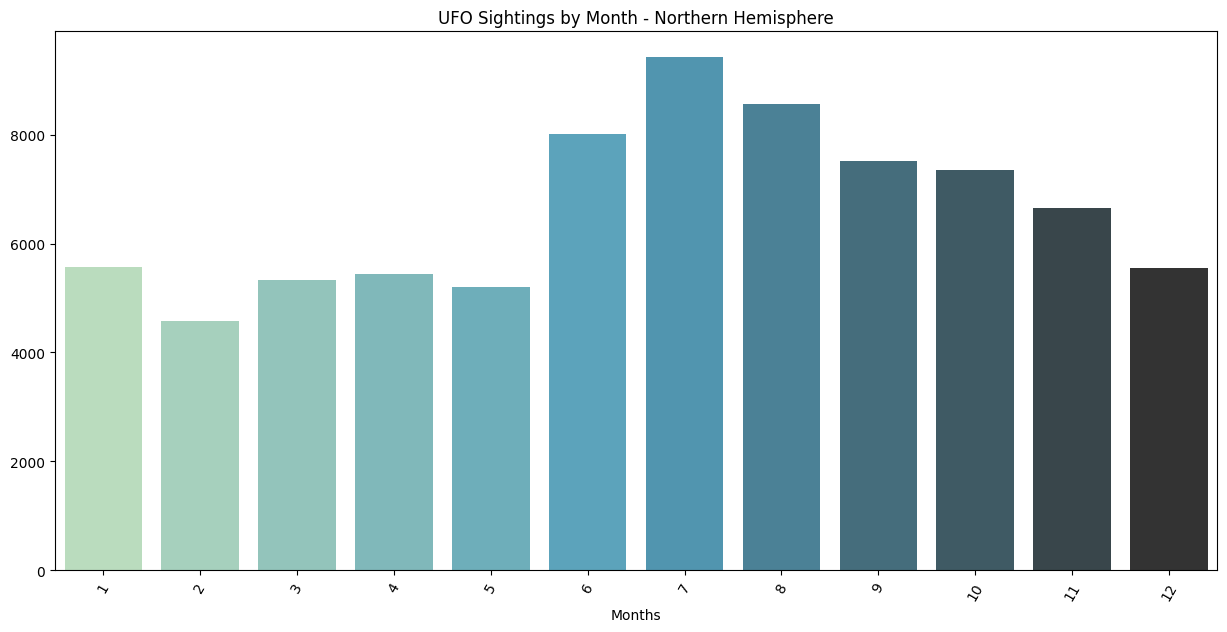

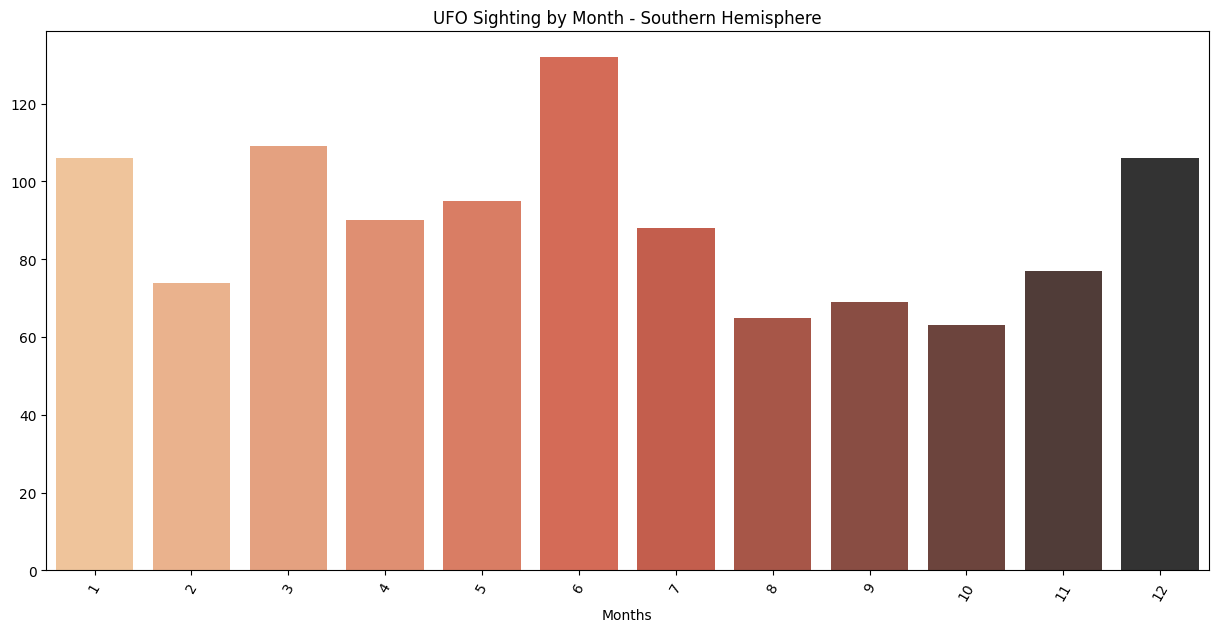

Top Months for UFO Sightings in N. Hemishpere:
7     9424
8     8562
6     8004
9     7511
10    7343
11    6659
Name: datetime, dtype: int64
Top Months for UFO Sightings in S. Hemisphere:
6     132
3     109
1     106
12    106
5      95
4      90
Name: datetime, dtype: int64


In [165]:
n_mon = resp_n['datetime'].dt.month
s_mon = resp_s['datetime'].dt.month

# N.MONTH #
monn_cts = n_mon.value_counts().sort_index()
monn_in = monn_cts.index
monn_val = monn_cts.values

# S.MONTH #
mons_cts = s_mon.value_counts().sort_index()
mons_in = mons_cts.index
mons_val = mons_cts.values

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60)
plt.xlabel("Months")
plt.title('UFO Sightings by Month - Northern Hemisphere')
sns.barplot(x=monn_in,y=monn_val,hue=monn_in,legend=False,palette="GnBu_d")
plt.show()

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60)
plt.xlabel("Months")
plt.title('UFO Sighting by Month - Southern Hemisphere')
sns.barplot(x=mons_in, y=mons_val,hue=mons_in,legend=False,palette="OrRd_d")
plt.show()

print('Top Months for UFO Sightings in N. Hemishpere:')
print(n_mon.value_counts()[:6])
print('Top Months for UFO Sightings in S. Hemisphere:')
print(s_mon.value_counts()[:6])

In [166]:
# Conclusion
# 1.Geographic Distribution: The analysis unveiled that the United States encountered the highest
#   frequency of UFO sightings, with the state of Washington standing out as the region with the
#   most sightings. Further exploration into this specific area could yield valuable insights into
#   potential patterns or phenomena associated with UFO sightings.
# 2.Seasonal Patterns: The analysis revealed that UFO sightings tend to occur more frequently during
#   winters and summers compared to fall and spring. This observation suggests a potential relationship
#   between UFO sightings and seasonal factors, warranting further investigation into the reasons behind
#   this seasonal variation.
# 3.Hemispherical Distribution: The analysis indicates that UFO sightings are more prevalent in the
#   Northern Hemisphere compared to the Southern Hemisphere. This finding suggests a geographical disparity
#   in the frequency of sightings, prompting further inquiry into potential factors influencing this regional
#   discrepancy.